**@author : Kevin KURTZ** <br>
**@email : contact@kevin-kurtz.fr** <br>


In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Étape 2: Charger les données
data = pd.read_csv('emissions_ges_france.csv')
coordinates = pd.read_csv('communes_coordinates.csv', sep='|')

In [3]:
# Étape 3: Nettoyage et préparation des données
# Ajouter une colonne d'émissions totales
emission_columns = ['Agriculture', 'Autres transports', 'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier', 'Tertiaire']
data['Emissions Totales'] = data[emission_columns].sum(axis=1)  # Somme des émissions de chaque secteur

# Nettoyer les données (mettre les noms de communes en majuscules)
coordinates['Commune'] = coordinates['Commune'].str.upper()

# Fusionner les données avec les coordonnées
data_geo = pd.merge(data, coordinates, on='Commune', how='left')


C:\Users\ktzke\AppData\Local\Temp\ipykernel_26072\1374647481.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Emissions Totales', y='Commune', data=top_communes, palette='Spectral')


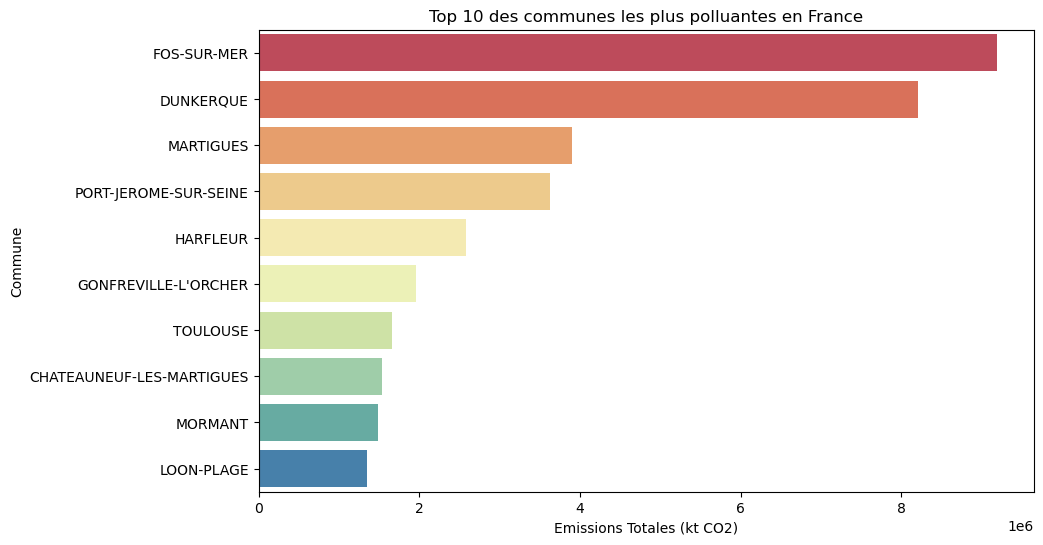

In [20]:
# Étape 4: Visualisation exploratoire des données
# Emissions totales par commune - top 10 communes les plus polluantes
top_communes = data_geo[['Commune', 'Emissions Totales']].sort_values(by='Emissions Totales', ascending=False).head(10)
plt.figure(figsize=(10,6))
# il faut une palette de couleurs allant de couleurs froides à chaudes (chaud = plus de pollution)
sns.barplot(x='Emissions Totales', y='Commune', data=top_communes, palette='Spectral')
plt.title('Top 10 des communes les plus polluantes en France')
plt.xlabel('Emissions Totales (kt CO2)')
plt.ylabel('Commune')
plt.show()

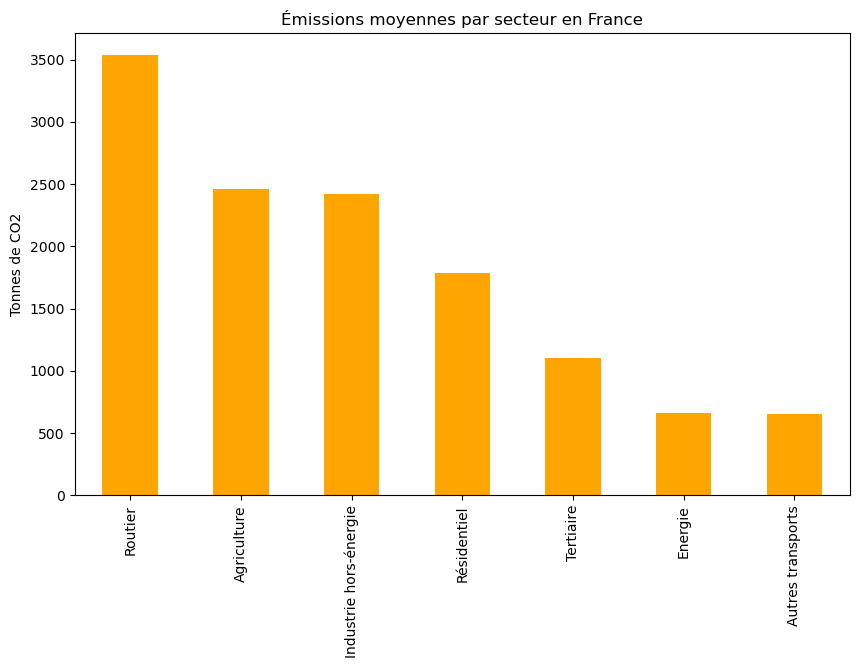

In [23]:
# Étape 5: Analyse sectorielle des émissions
plt.figure(figsize=(10,6))
data[emission_columns].mean().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Émissions moyennes par secteur en France")
plt.ylabel("Tonnes de CO2")
plt.show()


In [11]:
from folium.plugins import HeatMap

# Créer une liste de points de chaleur avec la latitude, la longitude et l'émission
heat_data = [[row['Latitude'], row['Longitude'], row['Emissions Totales']] for index, row in data_geo.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]

# Créer une carte centrée sur la France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajouter la heatmap à la carte
HeatMap(heat_data, radius=15).add_to(m)

# Afficher la carte
m


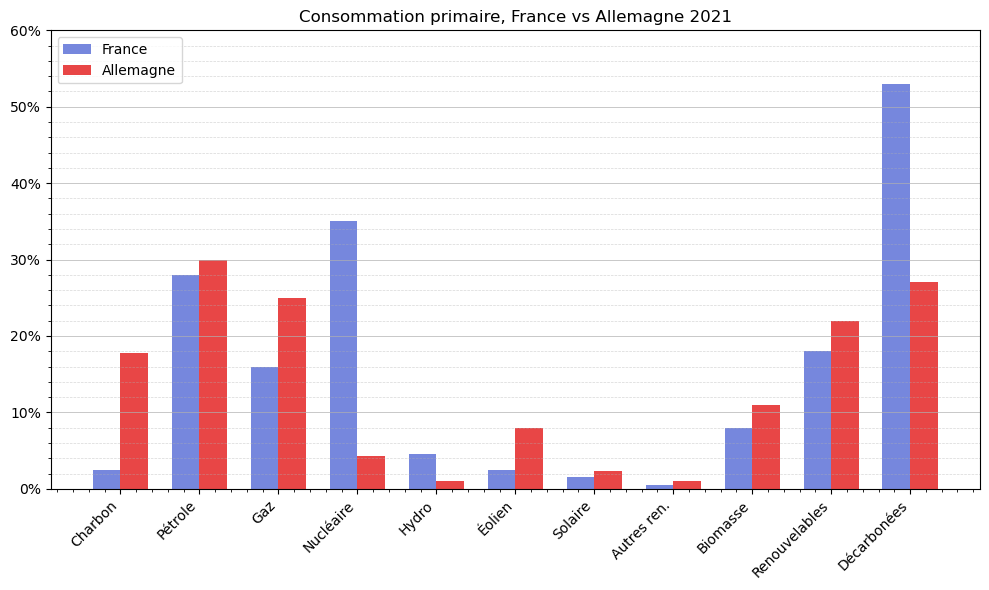

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Données
categories = ['Charbon', 'Pétrole', 'Gaz', 'Nucléaire', 'Hydro', 'Éolien', 'Solaire', 'Autres ren.', 'Biomasse', 'Renouvelables', 'Décarbonées']

france_values = [2.5, 28, 16, 35, 4.6, 2.5, 1.5, 0.5, 8, 18, 53]  # Nouvelles données de la France
allemagne_values = [17.8, 30, 25, 4.3, 1, 8, 2.3, 1, 11, 22, 27]  # Données de l'Allemagne

# Couleurs pastel similaires en bleu
couleur_france = '#7687dd'  # Bleu pastel clair
couleur_allemagne = '#e84646'  # Bleu pastel plus intense

# Paramètres du graphique
x = np.arange(len(categories))  # L'emplacement des labels des catégories
width = 0.35  # Largeur des barres

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour la France
bars_france = ax.bar(x - width/2, france_values, width, label='France', color=couleur_france)

# Barres pour l'Allemagne
bars_allemagne = ax.bar(x + width/2, allemagne_values, width, label='Allemagne', color=couleur_allemagne)

# Ajout du signe '%' aux valeurs de l'axe des ordonnées
ax.set_yticks(np.arange(0, 61, 10))  # Grandes lignes à chaque 10%
ax.set_yticklabels([f'{i}%' for i in range(0, 61, 10)])

# Ajout du quadrillage principal et secondaire
ax.grid(True, which='major', axis='y', linestyle='-', linewidth=0.7, alpha=0.7)  # Quadrillage principal
ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.5, alpha=0.5)  # Quadrillage secondaire (lignes fines)

# Activation des lignes mineures pour créer un quadrillage secondaire
ax.minorticks_on()

# Labels et titre
ax.set_title('Consommation primaire, France vs Allemagne 2021')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")

# Positionnement de la légende en haut à gauche
ax.legend(loc='upper left')

# Ajustement pour les labels
plt.tight_layout()

# Affichage du graphique
plt.show()
